In [819]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy import constants
%matplotlib inline

Defining the Variables

In [820]:
# Parametersfor the benchmarking
fps=100.0
num_particles=1000
dt=1.0/fps
spatial_resolution=1E-6  # in metres per px
dust_diameter=7.14E-6 # in metres
dust_rho=1510.0
mu = 0
mass = 4.0 / 3.0 * np.pi * ( dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
# print(mass)
kb=constants.Boltzmann
T=1000 #temperature in Kelvin
sigma = np.sqrt(kb*T/mass)
print(sigma)

left=0
right=1751 # right border in px as per the camera of expt
up=1667 # up border in px as per the camera of expt
down=0
left_SI=left*spatial_resolution
right_SI=right*spatial_resolution
up_SI=up*spatial_resolution
down_SI=down*spatial_resolution
final_frame=100
n_bins=18

0.00021903148058823087


Generating initial x coordinates

In [821]:
# Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
unif_x = sts.uniform(left_SI, right_SI-left_SI)
sample_x=unif_x.rvs(num_particles)
# print(sample_x)
# fig, ax = plt.subplots()
# ax.hist(sample_v,100) # plot histogram
# ax.set_xlabel('x')
# ax.set_ylabel('measurements')
# print(sample_x_trunc)
# print(sample_x)
sample_x_in_resol= sample_x/spatial_resolution
# print(sample_x_in_resol[:10])
sample_x_rough= sample_x_in_resol.astype('int64')
# print(sample_x_trunc[:10])
sample_x_rough_prev_SI=sample_x_rough.astype('float64')*spatial_resolution

print(sample_x_rough_prev_SI)
# print(sample_x_SI)

[1.636e-03 6.400e-04 5.300e-05 1.052e-03 8.200e-05 5.300e-04 1.007e-03
 1.731e-03 1.345e-03 4.000e-04 1.612e-03 1.248e-03 1.288e-03 1.325e-03
 1.590e-04 1.727e-03 1.067e-03 1.720e-04 4.300e-05 1.158e-03 1.674e-03
 1.502e-03 3.270e-04 3.620e-04 1.609e-03 8.480e-04 8.030e-04 1.820e-04
 6.300e-04 4.970e-04 1.365e-03 9.270e-04 7.710e-04 3.490e-04 7.470e-04
 6.030e-04 1.830e-04 5.570e-04 1.051e-03 1.558e-03 1.800e-05 5.930e-04
 1.736e-03 1.233e-03 1.380e-04 1.043e-03 1.094e-03 8.260e-04 9.830e-04
 5.990e-04 1.422e-03 1.527e-03 1.683e-03 1.644e-03 7.460e-04 1.720e-03
 1.566e-03 1.590e-03 2.820e-04 1.619e-03 1.540e-04 1.047e-03 3.280e-04
 1.350e-03 5.790e-04 9.690e-04 3.020e-04 1.322e-03 9.540e-04 1.300e-04
 4.800e-04 1.120e-03 1.717e-03 1.090e-04 2.970e-04 1.378e-03 1.160e-04
 1.401e-03 3.170e-04 1.580e-04 1.614e-03 1.103e-03 1.149e-03 2.180e-04
 1.247e-03 1.597e-03 7.800e-05 1.070e-04 9.500e-05 1.334e-03 8.890e-04
 1.696e-03 1.516e-03 4.990e-04 3.950e-04 1.555e-03 1.671e-03 1.980e-04
 1.450

In [822]:
part_no = np.arange(0,num_particles,dtype = 'int') # array of particles ID numbers
# part_no

Generating velocities

Text(0, 0.5, 'measurements')

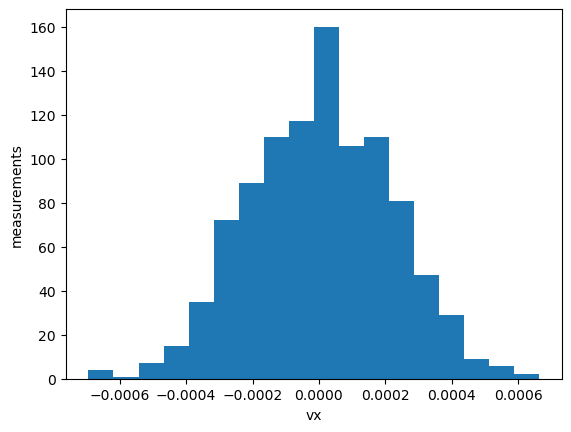

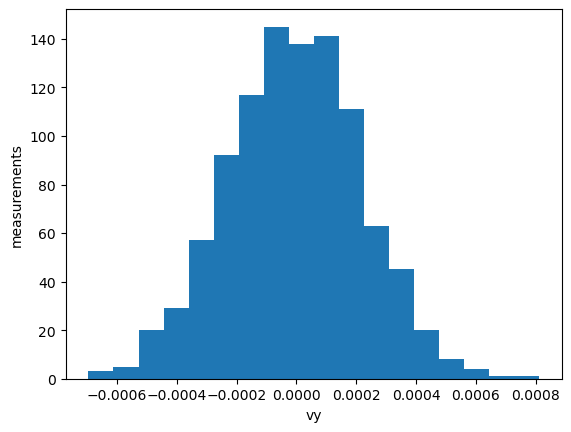

In [823]:
# Generate a sample of 1000 random velocities from a normal distribution
norm_rv = sts.norm(mu, sigma)
sample_vx = norm_rv.rvs(num_particles) #generate a sample of certain size
sample_vy= norm_rv.rvs(num_particles) #generate a sample of certain size
# print(sample_v)
fig, ax = plt.subplots()
ax.hist(sample_vx, n_bins) # plot histogram
ax.set_xlabel('vx')
ax.set_ylabel('measurements')
fig, ax = plt.subplots()
ax.hist(sample_vy, n_bins) # plot histogram
ax.set_xlabel('vy')
ax.set_ylabel('measurements')
# print(sample_v)

Calculating cordinates in next frame

Text(0, 0.5, 'measurements')

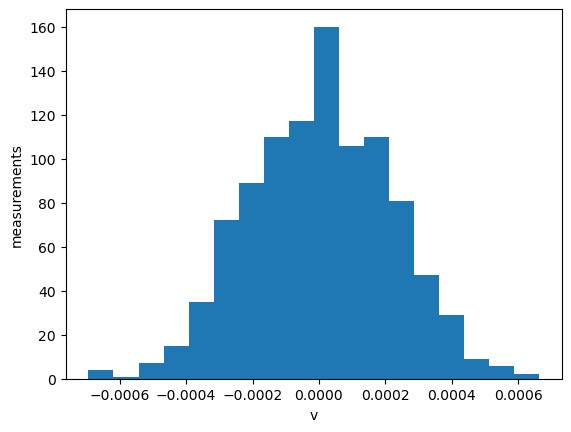

In [824]:
# Simulating the motion of the particles
x_forward=sample_x + sample_vx*dt
x_forward_in_resol=x_forward/spatial_resolution
# print(x_forward_in_resol[:10])
x_forward_trunc=x_forward_in_resol.astype('int64')   
#print(x_forward_trunc)
# print(x_forward_trunc[:10])
x_forward_rough_SI=x_forward_trunc.astype('float64')*spatial_resolution
# print(x_forward_SI)
fig, ax = plt.subplots()
ax.hist(sample_vx, n_bins) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Calculating the discrepancies

[-3.e-04 -2.e-04 -2.e-04  1.e-04  0.e+00  0.e+00  2.e-04  0.e+00 -4.e-04
  5.e-04]
[-2.67386799e-04 -2.58808037e-04 -2.69379114e-04  1.04318683e-04
 -4.70302026e-05  2.80462217e-05  2.41046845e-04 -3.68600388e-05
 -3.28422584e-04  5.13780596e-04]
3.1356994020191824e-05
0.4374872448858788
43.748724488587875


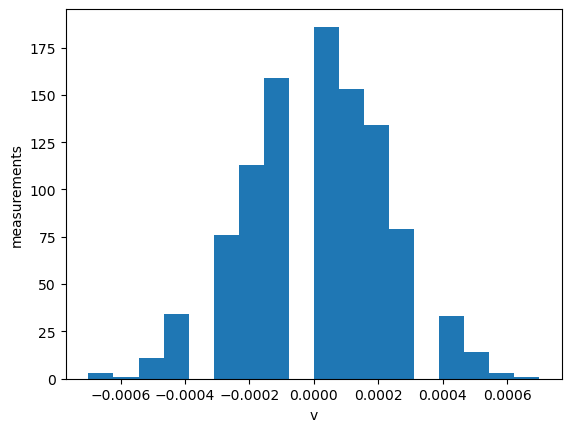

In [825]:
# Calculating restored velocities
v_restored=(x_forward_rough_SI - sample_x_rough_prev_SI)/dt
print(v_restored[:10])
print(sample_vx[:10])   
fig, ax = plt.subplots()
ax.hist(v_restored, n_bins) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')

# print(sample_vx[:10])

# Calculating the discrepancy between the original and restored velocities
discrepancy=np.abs(sample_vx-v_restored)
print(np.mean(discrepancy))
frac_discrepancy=np.abs(discrepancy/sample_vx)
print(np.mean(frac_discrepancy))
percent_discrepancy=frac_discrepancy*100
print(np.mean(percent_discrepancy))

Code to simulate motion in y

In [826]:
# Generate a sample of 1000 random numbers from a uniform distribution to act as the y coordinates of the particles
unif_y = sts.uniform(down_SI, up_SI-down_SI)
sample_y=unif_y.rvs(num_particles)
sample_y_in_resol= sample_y/spatial_resolution
sample_y_rough= sample_y_in_resol.astype('int64')
sample_y_rough_prev_SI=sample_y_rough.astype('float64')*spatial_resolution

Text(0, 0.5, 'measurements')

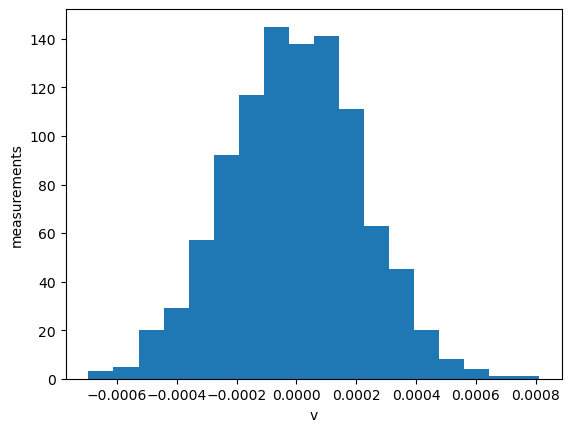

In [827]:
# Simulating the motion of the particles
y_forward=sample_y_rough_prev_SI+sample_vy*dt
y_forward_in_resol=y_forward/spatial_resolution
y_forward_rough=y_forward_in_resol.astype('int64')
# print(x_forward_trunc)
y_forward_rough_SI=y_forward_rough.astype('float64')*spatial_resolution
# print(x_forward_SI)
fig, ax = plt.subplots()
ax.hist(sample_vy, n_bins) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Making the database of co-ordinates for two frames

In [828]:
def make_velocities(fps,num_particles,spatial_resolution, mu,T, right_border_px, up_border_px,final_frame):
    dt=1.0/fps
    init_frame=1
    dust_diameter=7.14E-6 
    dust_rho=1510.0
    mass = 4.0 / 3.0 * np.pi * (dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
    # print(mass)
    kb=constants.Boltzmann
    sigma = np.sqrt(kb*T/mass)
    # print(sigma)
    left=0
    down=0
    down_SI=down*spatial_resolution
    left_SI=left*spatial_resolution
    up_SI=up_border_px*spatial_resolution
    right_SI=right_border_px*spatial_resolution
    frame_full_df=pd.DataFrame()
    while init_frame<=final_frame:
        if init_frame==1:
            # Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
            unif_x = sts.uniform(left_SI, right_SI-left_SI)
            sample_x=unif_x.rvs(num_particles)
            sample_x_in_resol= sample_x/spatial_resolution
            sample_x_trunc= sample_x_in_resol.astype('int64')
            sample_x_trunc_SI=sample_x_trunc.astype('float64')*spatial_resolution
            
            unif_y = sts.uniform(down_SI, up_SI-down_SI)
            sample_y=unif_y.rvs(num_particles)
            sample_y_in_resol= sample_y/spatial_resolution
            sample_y_trunc= sample_y_in_resol.astype('int64')
            sample_y_trunc_SI=sample_y_trunc.astype('float64')*spatial_resolution

            part_no = np.arange(0,num_particles,dtype = 'int') # array of particles ID numbers
            # Generate a sample of 1000 random velocities from a normal distribution
            norm_rv = sts.norm(mu, sigma)
            sample_vx = norm_rv.rvs(num_particles) #generate a sample of certain size
            sample_vy = norm_rv.rvs(num_particles) #generate a sample of certain size
            
        # Simulating the motion of the particles for x coordinates
        x_forward = sample_x_trunc_SI + sample_vx*dt
        x_forward_in_resol = x_forward / spatial_resolution
        x_forward_trunc = x_forward_in_resol.astype('int64')
        x_forward_SI = x_forward_trunc.astype('float64') * spatial_resolution
        # Simulating the motion of the particles for y coordinates
        y_forward = sample_y_trunc_SI + sample_vy * dt
        y_forward_in_resol = y_forward / spatial_resolution
        y_forward_trunc = y_forward_in_resol.astype('int64')
        y_forward_SI=y_forward_trunc.astype('float64')*spatial_resolution

        # Calculating restored velocities
        v_restored_x=(x_forward_SI- sample_x_trunc_SI)/dt
        v_restored_y=(y_forward_SI- sample_y_trunc_SI)/dt
        # Append the data for the current frame
        frame_data={'part_no':part_no, 'x': sample_x_trunc_SI, 'y':sample_y_trunc_SI, 'frame': init_frame,'vx (restored)': v_restored_x, 'vy (restored)': v_restored_y, 'vx': sample_vx, 'vy': sample_vy}
        frame_df=pd.DataFrame(frame_data)
        frame_full_df = pd.concat([frame_full_df, frame_df], ignore_index=True)
        sample_x_trunc_SI=x_forward_SI
        sample_y_trunc_SI= y_forward_SI
        init_frame+=1
    return frame_full_df

In [829]:
# Print the DataFrame for each frame
x_y_df = make_velocities(fps,num_particles,spatial_resolution, mu,T, right, up, final_frame)
x_y_df


,part_no,x,y,frame,vx (restored),vy (restored),vx,vy
0,0,0.000175,0.000080,1,0.0002,0.0000,0.000300,0.000007
1,1,0.001538,0.001642,1,-0.0001,0.0001,-0.000091,0.000160
2,2,0.000523,0.001148,1,-0.0002,-0.0001,-0.000145,-0.000093
3,3,0.000231,0.000690,1,-0.0005,-0.0001,-0.000487,-0.000024
4,4,0.001254,0.000869,1,0.0001,0.0002,0.000104,0.000252
...,...,...,...,...,...,...,...,...
99995,995,0.001168,0.000025,100,0.0002,-0.0001,0.000268,-0.000066
99996,996,0.000630,0.000864,100,-0.0001,-0.0003,-0.000010,-0.000214
99997,997,0.001004,0.001164,100,0.0001,0.0000,0.000118,0.000057
99998,998,0.000205,0.001326,100,0.0001,-0.0002,0.000184,-0.000175


<BarContainer object of 18 artists>

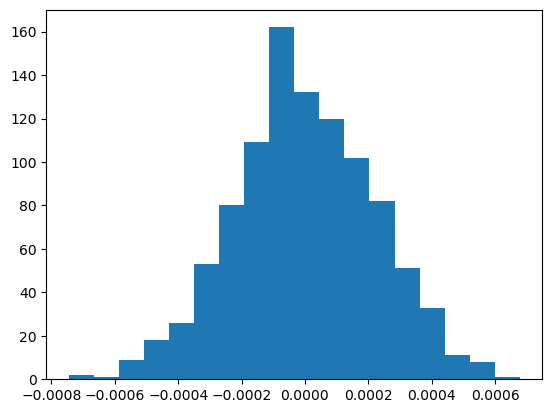

In [830]:
counts_act, bins_act = np.histogram(x_y_df['vx'], bins = n_bins)
fig_act, ax_act = plt.subplots()
arr_bins_centers = 0.5 * (bins_act[1:] + bins_act[:-1])
ax_act.bar(arr_bins_centers, counts_act/(final_frame), width = (arr_bins_centers[1] - arr_bins_centers[0]))

<BarContainer object of 18 artists>

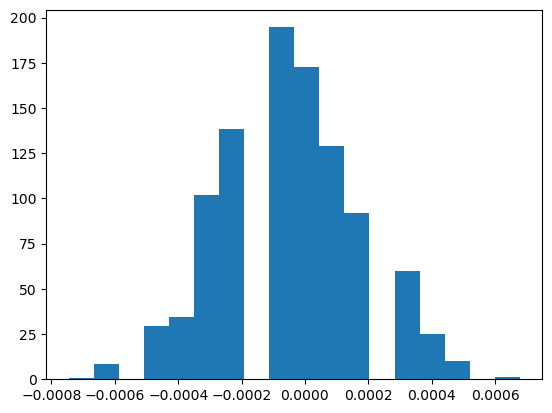

In [831]:
fig, ax = plt.subplots()
bins = arr_bins_centers - 0.5 * (arr_bins_centers[1] - arr_bins_centers[0])
bins = np.append(bins, bins[-1] + (bins[1] - bins[0]))
vx_restored = np.array(x_y_df['vx (restored)'])
counts_res, bins_res = np.histogram(vx_restored, bins = bins)
arr_bins_res_centers = 0.5 * (bins_res[1:] + bins_res[:-1])
ax.bar(arr_bins_res_centers, counts_res/(final_frame), width = (arr_bins_centers[1] - arr_bins_centers[0]))

<BarContainer object of 18 artists>

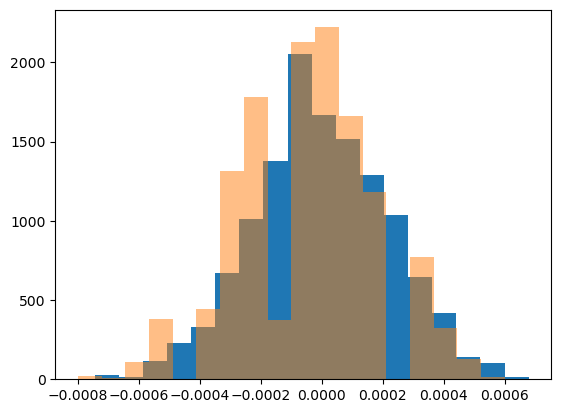

In [832]:
counts, bins = np.histogram(x_y_df['vx'], bins = n_bins, density = True)
fig, ax = plt.subplots()
arr_bins_centers = 0.5 * (bins[1:] + bins[:-1])
ax.bar(arr_bins_centers, counts, width = (arr_bins_centers[1] - arr_bins_centers[0]))
# print(sample_v)
bins = arr_bins_centers - 0.5 * (arr_bins_centers[1] - arr_bins_centers[0])
bins = np.append(bins, bins[-1] + (bins[1] - bins[0]))
vx_restored = np.array(x_y_df['vx (restored)'])
counts_res, bins_res = np.histogram(vx_restored, bins = n_bins, density = True)
arr_bins_centers = 0.5 * (bins_res[1:] + bins_res[:-1])
ax.bar(arr_bins_centers, counts_res, width = (arr_bins_centers[1] - arr_bins_centers[0]),alpha=0.5)

In [833]:
vx_restored=x_y_df['vx (restored)']
sample_vx=x_y_df['vx']
print(np.std(vx_restored))
print(np.std(sample_vx))
print(mass*np.std(sample_vx)**2/constants.Boltzmann)
print(mass*np.std(x_y_df['vx (restored)'])**2/constants.Boltzmann)

0.00022133020376805877
0.0002218591722059066
1025.9866237352003
1021.1000323738131


Function to get the discrepancies

In [834]:
def get_percent_discrepancies(v_restored,v_actual):
    discrepancy = np.abs(v_actual - v_restored)
    # print(np.mean(discrepancy))
    frac_discrepancy = np.abs(discrepancy / v_actual)
    # print(np.mean(frac_discrepancy))
    percent_discrepancy = frac_discrepancy*100
    # print(np.mean(percent_discrepancy))
    return np.mean(percent_discrepancy)

In [835]:
get_percent_discrepancies(vx_restored,sample_vx)

153.29846550192892

<BarContainer object of 18 artists>

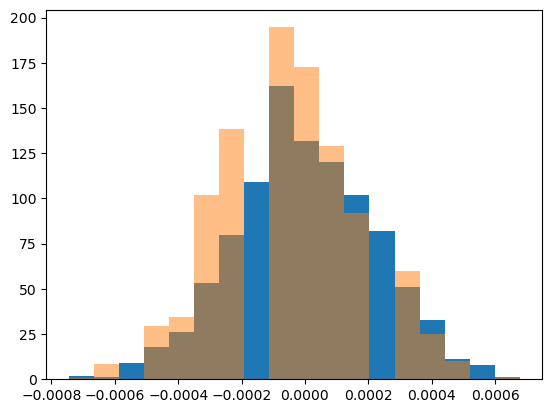

In [836]:
df=make_velocities(fps,num_particles,spatial_resolution, mu,T, right, up,3)
counts, bins = np.histogram(sample_vx, bins = n_bins)
fig, ax = plt.subplots()
arr_bins_centers = 0.5 * (bins[1:] + bins[:-1])
ax.bar(arr_bins_centers, counts/final_frame, width = (arr_bins_centers[1] - arr_bins_centers[0]))
# print(sample_v)
bins = arr_bins_centers - 0.5 * (arr_bins_centers[1] - arr_bins_centers[0])
bins = np.append(bins, bins[-1] + (bins[1] - bins[0]))
vx_restored = np.array(x_y_df['vx (restored)'])
counts_res, bins_res = np.histogram(vx_restored, bins = bins)
arr_bins_centers = 0.5 * (bins_res[1:] + bins_res[:-1])
ax.bar(arr_bins_centers, counts_res/final_frame, width = (arr_bins_centers[1] - arr_bins_centers[0]),alpha=0.5)

In [837]:
spatial_resolution_arr=np.arange(1E-9,1E-6,1E-8)
print(spatial_resolution_arr)
print(len(spatial_resolution_arr))


[1.00e-09 1.10e-08 2.10e-08 3.10e-08 4.10e-08 5.10e-08 6.10e-08 7.10e-08
 8.10e-08 9.10e-08 1.01e-07 1.11e-07 1.21e-07 1.31e-07 1.41e-07 1.51e-07
 1.61e-07 1.71e-07 1.81e-07 1.91e-07 2.01e-07 2.11e-07 2.21e-07 2.31e-07
 2.41e-07 2.51e-07 2.61e-07 2.71e-07 2.81e-07 2.91e-07 3.01e-07 3.11e-07
 3.21e-07 3.31e-07 3.41e-07 3.51e-07 3.61e-07 3.71e-07 3.81e-07 3.91e-07
 4.01e-07 4.11e-07 4.21e-07 4.31e-07 4.41e-07 4.51e-07 4.61e-07 4.71e-07
 4.81e-07 4.91e-07 5.01e-07 5.11e-07 5.21e-07 5.31e-07 5.41e-07 5.51e-07
 5.61e-07 5.71e-07 5.81e-07 5.91e-07 6.01e-07 6.11e-07 6.21e-07 6.31e-07
 6.41e-07 6.51e-07 6.61e-07 6.71e-07 6.81e-07 6.91e-07 7.01e-07 7.11e-07
 7.21e-07 7.31e-07 7.41e-07 7.51e-07 7.61e-07 7.71e-07 7.81e-07 7.91e-07
 8.01e-07 8.11e-07 8.21e-07 8.31e-07 8.41e-07 8.51e-07 8.61e-07 8.71e-07
 8.81e-07 8.91e-07 9.01e-07 9.11e-07 9.21e-07 9.31e-07 9.41e-07 9.51e-07
 9.61e-07 9.71e-07 9.81e-07 9.91e-07]
100


In [838]:
discrepancy_arr=[]
T_discrepancy_arr=[]
for i in range(len(spatial_resolution_arr)):
    spatial_resolution_loop=spatial_resolution_arr[i]
    df=make_velocities(fps,num_particles,spatial_resolution_loop, mu,T, right, up,100)
    discrepancy=get_percent_discrepancies(df[df['frame']==1]['vx (restored)'],df[df['frame']==1]['vx'])
    discrepancy_arr.append(discrepancy)
    T_restored=mass*np.std(df[df['frame']==1]['vx (restored)'])**2/constants.Boltzmann
    T_discrepancy_arr.append(np.abs(T-T_restored)/T)

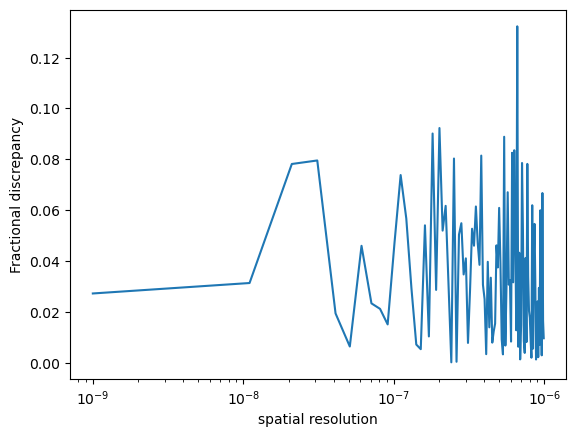

In [839]:
fig, ax = plt.subplots()
ax.plot(spatial_resolution_arr, T_discrepancy_arr)
ax.set_xlabel('spatial resolution')
ax.set_ylabel('Fractional discrepancy')
ax.set_xscale('log')

In [840]:
fps_arr=np.arange(1E1,1E4,1E2)
print(fps_arr)
print(len(fps_arr))

[  10.  110.  210.  310.  410.  510.  610.  710.  810.  910. 1010. 1110.
 1210. 1310. 1410. 1510. 1610. 1710. 1810. 1910. 2010. 2110. 2210. 2310.
 2410. 2510. 2610. 2710. 2810. 2910. 3010. 3110. 3210. 3310. 3410. 3510.
 3610. 3710. 3810. 3910. 4010. 4110. 4210. 4310. 4410. 4510. 4610. 4710.
 4810. 4910. 5010. 5110. 5210. 5310. 5410. 5510. 5610. 5710. 5810. 5910.
 6010. 6110. 6210. 6310. 6410. 6510. 6610. 6710. 6810. 6910. 7010. 7110.
 7210. 7310. 7410. 7510. 7610. 7710. 7810. 7910. 8010. 8110. 8210. 8310.
 8410. 8510. 8610. 8710. 8810. 8910. 9010. 9110. 9210. 9310. 9410. 9510.
 9610. 9710. 9810. 9910.]
100


In [841]:
discrepancy_arr=[]
T_discrepancy_arr=[]
for i in range(len(fps_arr)):
    fps_loop=fps_arr[i]
    df=make_velocities(fps_loop,num_particles,spatial_resolution, mu,T, right, up,final_frame)
    discrepancy=get_percent_discrepancies(df[df['frame']==1]['vx (restored)'],df[df['frame']==1]['vx'])
    discrepancy_arr.append(discrepancy)
    T_restored=mass*np.std(df[df['frame']==1]['vx (restored)'])**2/constants.Boltzmann
    T_discrepancy_arr.append(np.abs(T-T_restored)/T)

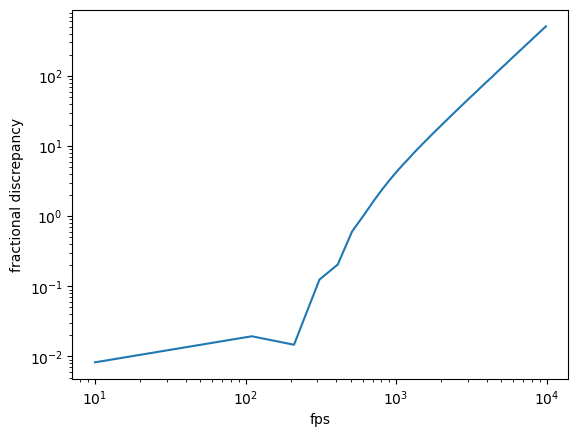

In [842]:
fig, ax = plt.subplots()
ax.plot(fps_arr, T_discrepancy_arr)
ax.set_xlabel('fps')
ax.set_ylabel('fractional discrepancy')
ax.set_xscale('log')
ax.set_yscale('log')